## KIVA (Preprocessing & EDA)

### Importing libaraies & Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
%matplotlib inline
sns.set()
# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [2]:
loans = pd.read_csv("kiva_loans.csv")
lenders = pd.read_csv("loan_themes_by_region.csv")
loans_lenders = pd.read_csv("loan_theme_ids.csv")
country_stats = pd.read_csv("kiva_mpi_region_locations.csv")

### Inspecting Data

In [3]:
print('the size of loans_data=',loans.shape)
print('the size of lenders_data=',lenders.shape)
print('the size of loans_lenders_data=',loans_lenders.shape)
print('the size of country_stats_data=',country_stats.shape)

the size of loans_data= (671205, 20)
the size of lenders_data= (15736, 21)
the size of loans_lenders_data= (779092, 4)
the size of country_stats_data= (2772, 9)


In [4]:
loans_lenders.head()

id    Loan Theme ID          Loan Theme Type  Partner ID
0  638631  a1050000000skGl                  General       151.0
1  640322  a1050000000skGl                  General       151.0
2  641006  a1050000002X1ij         Higher Education       160.0
3  641019  a1050000002X1ij         Higher Education       160.0
4  641594  a1050000002VbsW  Subsistence Agriculture       336.0

In [5]:
country_stats.head()

LocationName  ISO      country      region world_region    MPI  \
0  Badakhshan, Afghanistan  AFG  Afghanistan  Badakhshan   South Asia  0.387   
1     Badghis, Afghanistan  AFG  Afghanistan     Badghis   South Asia  0.466   
2     Baghlan, Afghanistan  AFG  Afghanistan     Baghlan   South Asia  0.300   
3       Balkh, Afghanistan  AFG  Afghanistan       Balkh   South Asia  0.301   
4      Bamyan, Afghanistan  AFG  Afghanistan      Bamyan   South Asia  0.325   

                               geo        lat        lon  
0  (36.7347725, 70.81199529999999)  36.734772  70.811995  
1         (35.1671339, 63.7695384)  35.167134  63.769538  
2         (35.8042947, 69.2877535)  35.804295  69.287754  
3         (36.7550603, 66.8975372)  36.755060  66.897537  
4         (34.8100067, 67.8212104)  34.810007  67.821210

### Statistical Overview of the Data

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [7]:
loans.describe().round(2)

id  funded_amount  loan_amount  partner_id  term_in_months  \
count   671205.00       671205.0    671205.00   657698.00       671205.00   
mean    993248.59          786.0       842.40      178.20           13.74   
std     196611.28         1130.4      1198.66       94.25            8.60   
min     653047.00            0.0        25.00        9.00            1.00   
25%     823072.00          250.0       275.00      126.00            8.00   
50%     992780.00          450.0       500.00      145.00           13.00   
75%    1163653.00          900.0      1000.00      204.00           14.00   
max    1340339.00       100000.0    100000.00      536.00          158.00   

       lender_count  
count     671205.00  
mean          20.59  
std           28.46  
min            0.00  
25%            7.00  
50%           13.00  
75%           24.00  
max         2986.00

In [8]:
loans.describe(include=["O"])

activity       sector  \
count    671205       671205   
unique      163           15   
top     Farming  Agriculture   
freq      72955       180302   

                                                      use country_code  \
count                                              666973       671197   
unique                                             424912           86   
top     to buy a water filter to provide safe drinking...           PH   
freq                                                 5217       160441   

            country  region currency                posted_time  \
count        671205  614405   671205                     671205   
unique           87   12695       67                     667399   
top     Philippines  Kaduna      PHP  2017-05-15 00:00:00+00:00   
freq         160441   10000   160440                         25   

                   disbursed_time                funded_time           tags  \
count                      668809                     622874         499789   
unique                       5719                     498007          86719   
top     2017-02-01 08:00:00+00:00  2016-09-21 13:03:24+00:00  user_favorite   
freq                         2800                         33          27088   

       borrower_genders repayment_interval        date  
count            666984             671205      671205  
unique            11298                  4        1298  
top              female            monthly  2017-03-20  
freq             426502             342717        1308

### Data Pre_Processing
#### 1.1 Missing_Data
    

#### Missing data in kiva_loans:

In [9]:
#checking missing data in kiva_loans :
total = loans.isnull().sum().sort_values(ascending = False)
percent = (loans.isnull().sum()/loans.isnull().count()).sort_values(ascending = False)
missing_kiva_loans = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_kiva_loans

Total   Percent
tags                171416  0.255385
region               56800  0.084624
funded_time          48331  0.072006
partner_id           13507  0.020124
use                   4232  0.006305
borrower_genders      4221  0.006289
disbursed_time        2396  0.003570
country_code             8  0.000012
repayment_interval       0  0.000000
lender_count             0  0.000000
term_in_months           0  0.000000
id                       0  0.000000
posted_time              0  0.000000
funded_amount            0  0.000000
currency                 0  0.000000
country                  0  0.000000
sector                   0  0.000000
activity                 0  0.000000
loan_amount              0  0.000000
date                     0  0.000000

## Drop unuseful columns

In [10]:
loans.drop(columns=['tags','country_code','use','id','partner_id','region','date'],inplace=True)

In [11]:
loans.head()

funded_amount  loan_amount             activity          sector   country  \
0          300.0        300.0  Fruits & Vegetables            Food  Pakistan   
1          575.0        575.0             Rickshaw  Transportation  Pakistan   
2          150.0        150.0       Transportation  Transportation     India   
3          200.0        200.0           Embroidery            Arts  Pakistan   
4          400.0        400.0           Milk Sales            Food  Pakistan   

  currency                posted_time             disbursed_time  \
0      PKR  2014-01-01 06:12:39+00:00  2013-12-17 08:00:00+00:00   
1      PKR  2014-01-01 06:51:08+00:00  2013-12-17 08:00:00+00:00   
2      INR  2014-01-01 09:58:07+00:00  2013-12-17 08:00:00+00:00   
3      PKR  2014-01-01 08:03:11+00:00  2013-12-24 08:00:00+00:00   
4      PKR  2014-01-01 11:53:19+00:00  2013-12-17 08:00:00+00:00   

                 funded_time  term_in_months  lender_count borrower_genders  \
0  2014-01-02 10:06:32+00:00            12.0            12           female   
1  2014-01-02 09:17:23+00:00            11.0            14   female, female   
2  2014-01-01 16:01:36+00:00            43.0             6           female   
3  2014-01-01 13:00:00+00:00            11.0             8           female   
4  2014-01-01 19:18:51+00:00            14.0            16           female   

  repayment_interval  
0          irregular  
1          irregular  
2             bullet  
3          irregular  
4            monthly

### fill missing data in(funded_time , disbursed_time)with the mean of the difference 

In [12]:
loans.posted_time = pd.to_datetime(loans['posted_time'])
loans.disbursed_time = pd.to_datetime(loans['disbursed_time'])
loans.funded_time = pd.to_datetime(loans['funded_time'])

In [13]:
loans.funded_time.isna().sum()

48331

In [14]:
loans.disbursed_time.isna().sum()

2396

In [15]:
avg_date=loans['funded_time']-loans['posted_time']
avg_date.mean()

Timedelta('14 days 15:23:47.991605044')

In [16]:
avg=loans['funded_time']-loans['posted_time']
avg.mean()

Timedelta('14 days 15:23:47.991605044')

In [17]:
loans.funded_time.fillna(avg_date.mean()+loans.posted_time,inplace=True)

In [18]:
loans.disbursed_time.fillna(avg.mean()+loans.posted_time,inplace=True)

#### Missing data in kiva_lenders:

In [19]:
# missing data in kiva_lenders: 
total = lenders.isnull().sum().sort_values(ascending = False)
percent = (lenders.isnull().sum()/lenders.isnull().count()).sort_values(ascending = False)
missing_kiva_lenders= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_kiva_lenders

Total   Percent
geocode_old         14536  0.923742
mpi_geo              6065  0.385422
names                2075  0.131863
lon                  2074  0.131800
lat                  2074  0.131800
geocode              2074  0.131800
rural_pct            1392  0.088460
mpi_region             14  0.000890
ISO                    14  0.000890
LocationName            0  0.000000
geo                     0  0.000000
Partner ID              0  0.000000
amount                  0  0.000000
Field Partner Name      0  0.000000
region                  0  0.000000
forkiva                 0  0.000000
country                 0  0.000000
Loan Theme Type         0  0.000000
Loan Theme ID           0  0.000000
sector                  0  0.000000
number                  0  0.000000

#### Missing data in loans_lenders_data:

In [20]:
# missing data in loans_lenders_data 
total = loans_lenders.isnull().sum().sort_values(ascending = False)
percent = (loans_lenders.isnull().sum()/loans_lenders.isnull().count()).sort_values(ascending = False)
missing_loans_lenders= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_loans_lenders

Total   Percent
Loan Theme ID    14813  0.019013
Loan Theme Type  14813  0.019013
Partner ID       14813  0.019013
id                   0  0.000000

#### Missing data in country_stats_data:

In [21]:
# missing data in country_stats data: 
total = country_stats.isnull().sum().sort_values(ascending = False)
percent = (country_stats.isnull().sum()/country_stats.isnull().count()).sort_values(ascending = False)
missing_country_stats= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_country_stats

Total   Percent
lat            1880  0.678211
lon            1880  0.678211
LocationName   1788  0.645022
region         1788  0.645022
MPI            1788  0.645022
ISO            1764  0.636364
country        1764  0.636364
world_region   1764  0.636364
geo               0  0.000000

### Borrower Gender: Female V.S. Male

In [39]:
loans.borrower_genders=loans.borrower_genders.astype('str')

In [40]:
def parse_genders(borrower_genders):
    gender_list = borrower_genders.split(",")
    gender_list = list(set(gender_list))
    gender_list = [borrower_genders.strip() for borrower_genders in gender_list]
    if len(gender_list)==2:
        if 'female' in gender_list and 'male' in gender_list:
            return 'both'
        elif 'female' in gender_list:
            return 'female'
        elif 'male' in gender_list:
            return 'male'
    elif gender_list[0]=='female':
        return 'female'
    elif gender_list[0]=='male':
        return 'male'
    else:
        return 'unknown'
    

In [41]:
loans['gender'] = loans.borrower_genders.apply(lambda x: parse_genders(x))

In [42]:
loans.gender.value_counts()

female     511482
male       149204
both         6298
unknown      4221
Name: gender, dtype: int64

## Data Exploration

### Top sectors in which more loans were given

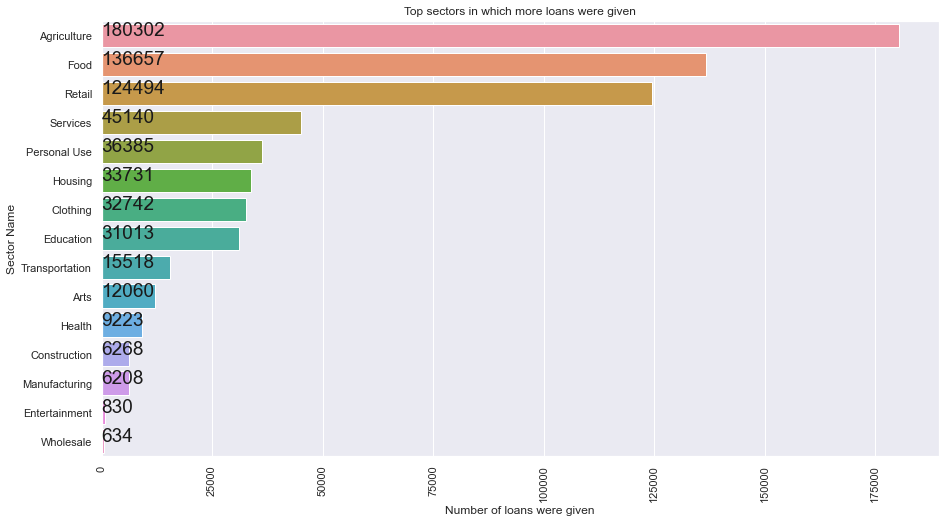

In [22]:
plt.figure(figsize=(15,8))
sector_name = loans['sector'].value_counts()
sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xticks(rotation='vertical')
plt.xlabel('Number of loans were given')
plt.ylabel('Sector Name')
plt.title("Top sectors in which more loans were given")
plt.show()

#### Note: Agriculture sector is very frequent followed by Food in terms of number of loans.

### the lowest trust countries to get the fund

<AxesSubplot:xlabel='country'>

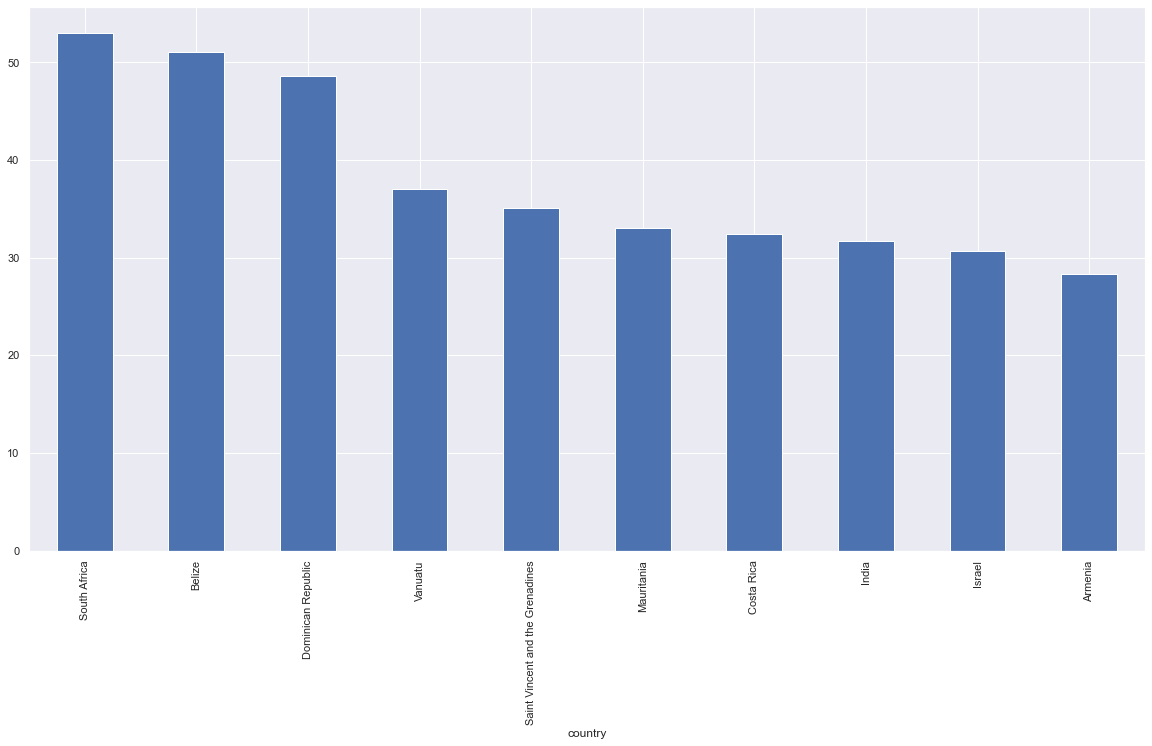

In [23]:
plt.figure(figsize=(20,10))
loans.groupby(['country'])['term_in_months'].mean().nlargest(10).plot(kind='bar')

### Types of repayment intervals

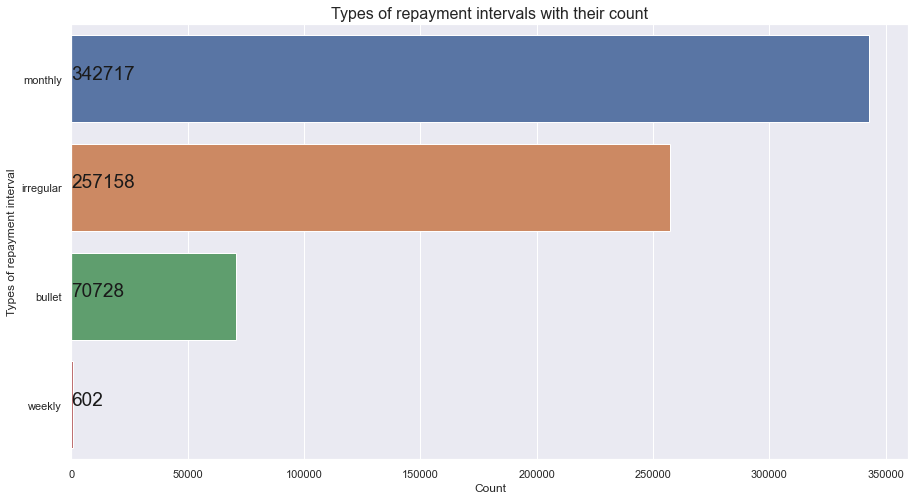

In [24]:
plt.figure(figsize=(15,8))
count = loans['repayment_interval'].value_counts()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(5,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Types of repayment interval', fontsize=12)
plt.title("Types of repayment intervals with their count", fontsize=16)
plt.show()

### Note: Types of repayment interval

    Monthly (More frequent)
    irregular
    bullet
    weekly (less frequent)



In [25]:
loans.repayment_interval.value_counts()

monthly      342717
irregular    257158
bullet        70728
weekly          602
Name: repayment_interval, dtype: int64

### Most frequent countries who got loans

Text(0.5, 1.0, 'Most frequent countries for kiva loan')

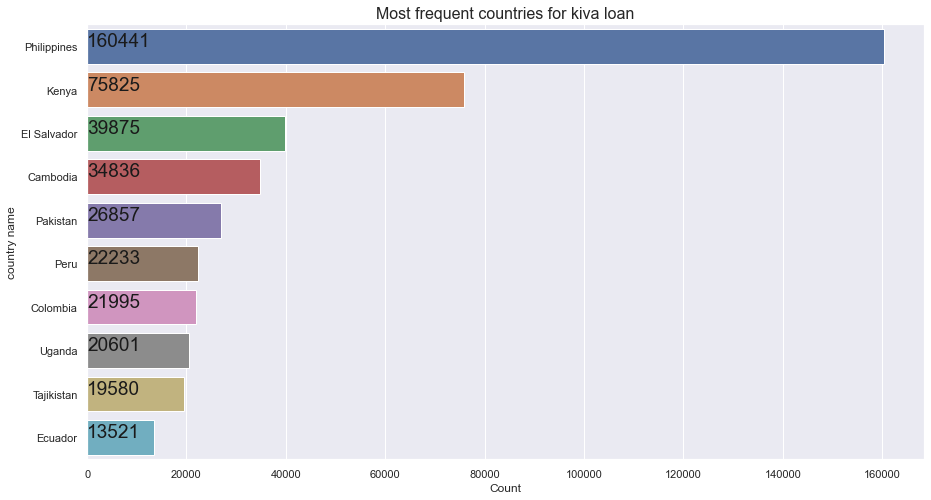

In [26]:
plt.figure(figsize=(15,8))
count = loans['country'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('country name', fontsize=12)
plt.title("Most frequent countries for kiva loan", fontsize=16)

### 

### prefered repayment type for each sector

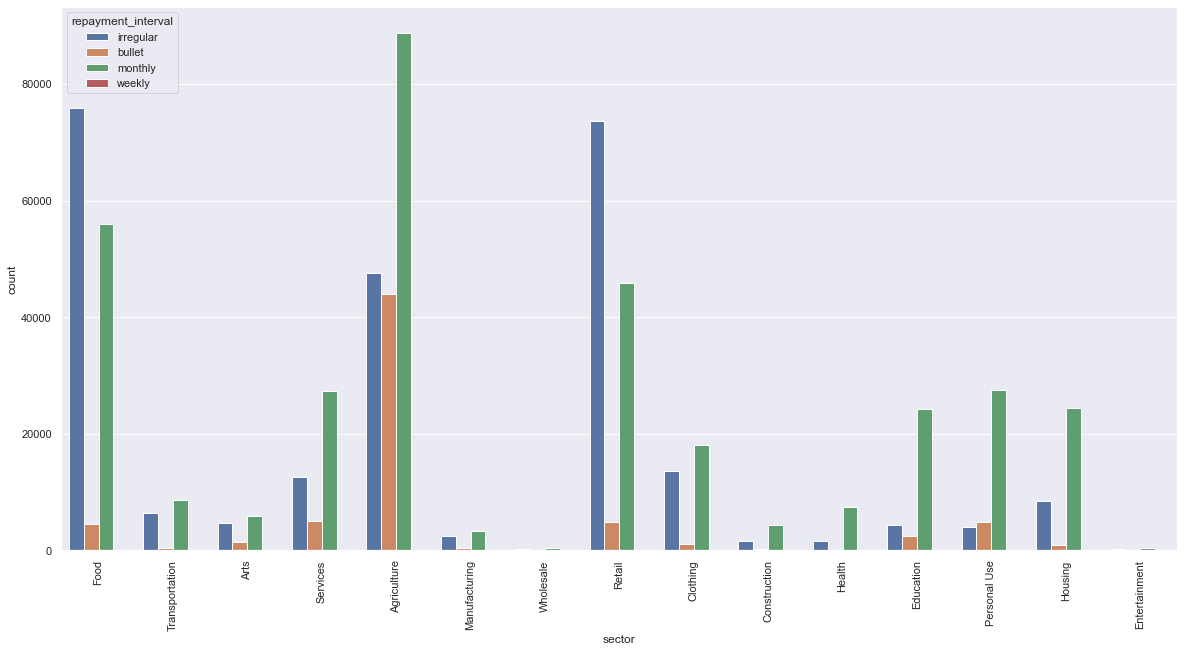

In [27]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data=loans, x="sector", hue="repayment_interval")
plt.show()

### Distribution of world regions

In [28]:
country_stats.dropna(inplace=True)

In [29]:
country_stats['world_region'].isna().sum()

0

Text(0.5, 1.0, 'Distribution of world regions')

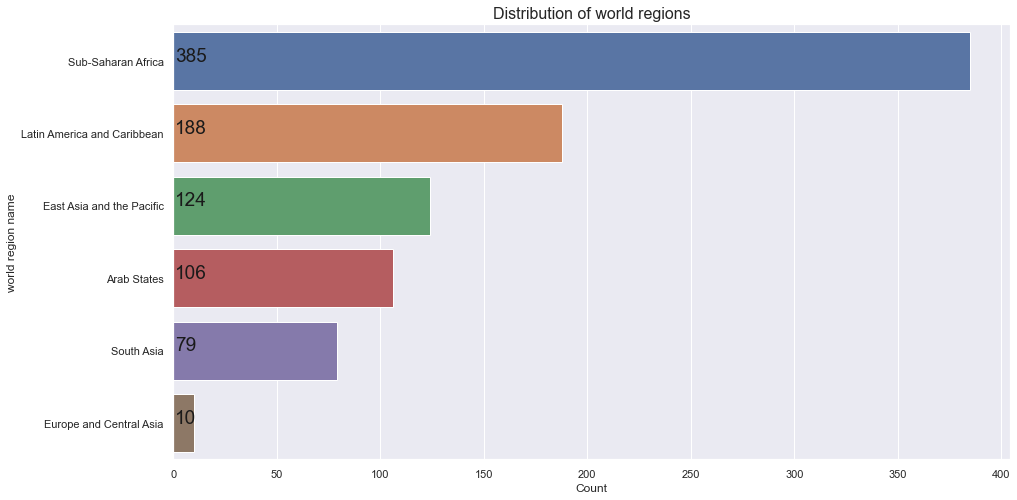

In [30]:
#Distribution of world regions
plt.figure(figsize=(15,8))
count = country_stats['world_region'].value_counts()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('world region name', fontsize=12)
plt.title("Distribution of world regions", fontsize=16)

### Note:
   *  A we can see sub-Saharan Africa got more number of loans.
   * Europe and central Asia is least frequent world region.

###  Distribution of Lender counts

In [31]:
loans['currency'].isna().sum()

0

<AxesSubplot:xlabel='currency'>

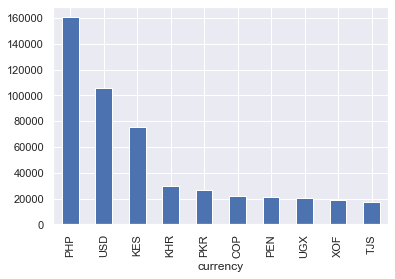

In [32]:
loans.groupby('currency')['loan_amount'].count().nlargest(10).plot(kind='bar')

### Note:
**the most required currency in loan_amount is (PHP)followed by(USD)**

In [33]:
#Distribution of lender count(Number of lenders contributing to loan)
print("Number of lenders contributing to loan : ", loans["lender_count"].nunique())
print(loans["lender_count"].value_counts().nlargest(10))

Number of lenders contributing to loan :  503
8     34204
7     32497
9     32476
1     31995
5     30439
6     29407
10    28171
11    25897
12    25291
4     24616
Name: lender_count, dtype: int64


### lender_count Vs loan_amount

In [34]:
plt.figure(figsize=(20,10))
loans.groupby('lender_count')['loan_amount'].count().nlargest(10)

lender_count
8     34204
7     32497
9     32476
1     31995
5     30439
6     29407
10    28171
11    25897
12    25291
4     24616
Name: loan_amount, dtype: int64

<Figure size 1440x720 with 0 Axes>

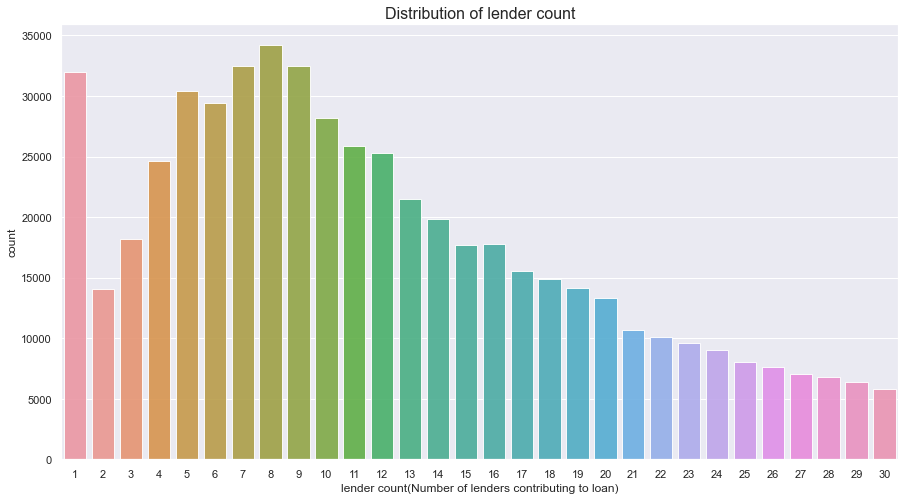

In [35]:
lender = loans['lender_count'].sort_values().value_counts().nlargest(30)
plt.figure(figsize=(15,8))
sns.barplot(lender.index, lender.values, alpha=0.9)
plt.xticks()
plt.xlabel('lender count(Number of lenders contributing to loan)', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Distribution of lender count", fontsize=16)
plt.show()

### Note:
* Number of lenders contributing to loan(lender_count) is 8 whose followed by 7 and 9.

### Distribution of Loan Activity type:

Text(0.5, 1.0, 'Top Loan Activity type')

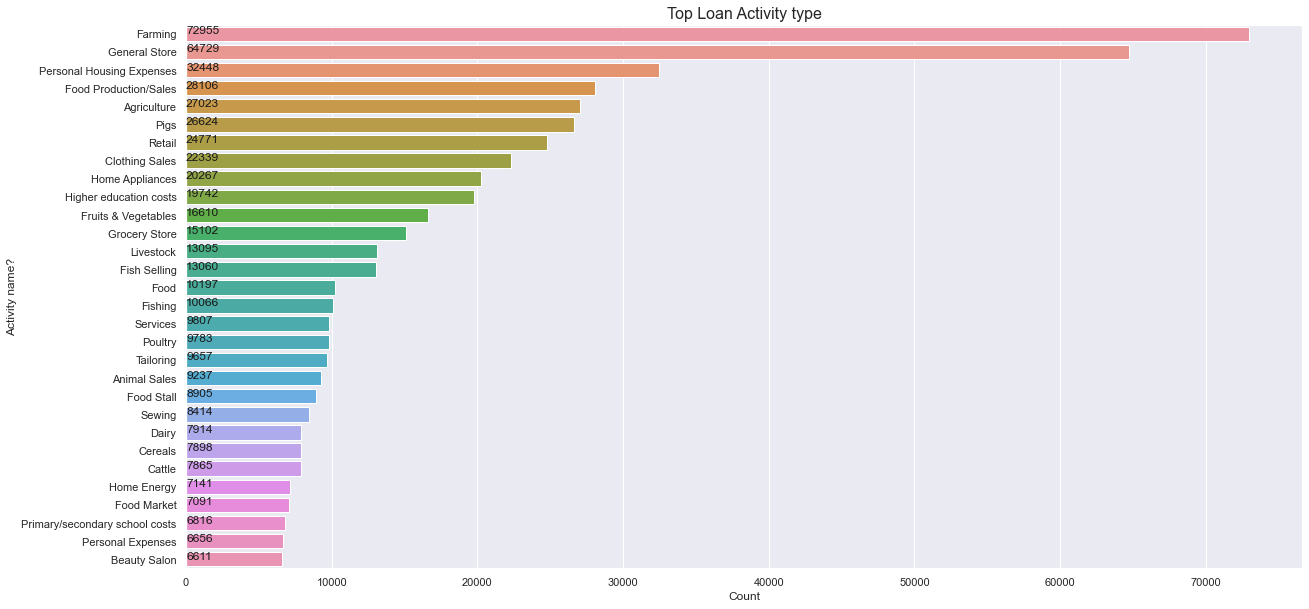

In [36]:
#Distribution of Loan Activity type:
plt.figure(figsize=(20,10))
count = loans['activity'].value_counts().nlargest(30)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Activity name?', fontsize=12)
plt.title("Top Loan Activity type", fontsize=16)

### Note:
* Top 2 loan activity which got more number of funded are Farming and general Store

### Distribution of terms_in_month(The duration for which the loan was disbursed in months)

In [37]:
#Distribution of Number of months over The duration for which the loan was disbursed in months:
print("Number of months over which loan was scheduled to be paid back : ",loans["term_in_months"].nunique())
print(loans["term_in_months"].value_counts().nlargest(10))

Number of months over which loan was scheduled to be paid back :  148
14.0    166750
8.0     143042
11.0     40694
7.0      32847
13.0     30501
20.0     28483
6.0      26039
12.0     25700
15.0     25255
26.0     23431
Name: term_in_months, dtype: int64


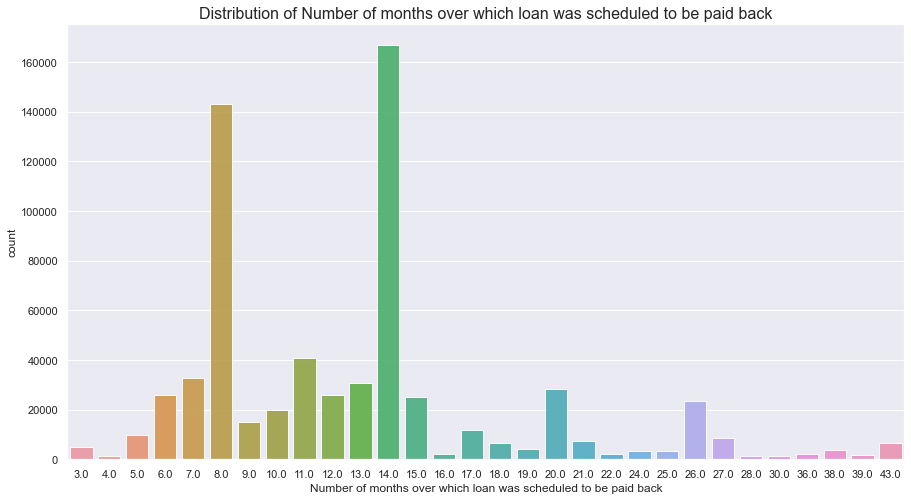

In [38]:
lender = loans['term_in_months'].value_counts().nlargest(30)
plt.figure(figsize=(15,8))
sns.barplot(lender.index, lender.values, alpha=0.9)
plt.xlabel('Number of months over which loan was scheduled to be paid back', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Distribution of Number of months over which loan was scheduled to be paid back", fontsize=16)
plt.show()

### Note:
* 14 months over which loan was scheduled to be paid back have followed by 8 and11.

In [43]:
temp_data = loans.gender.value_counts()
labels = temp_data.index
sizes = ((temp_data / temp_data.sum())*100)
plt.figure(figsize=(15,8))

trace = go.Pie(labels=labels, values=sizes,hoverinfo='label+percent')
layout = go.Layout(title='Gender')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender")

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='count'>

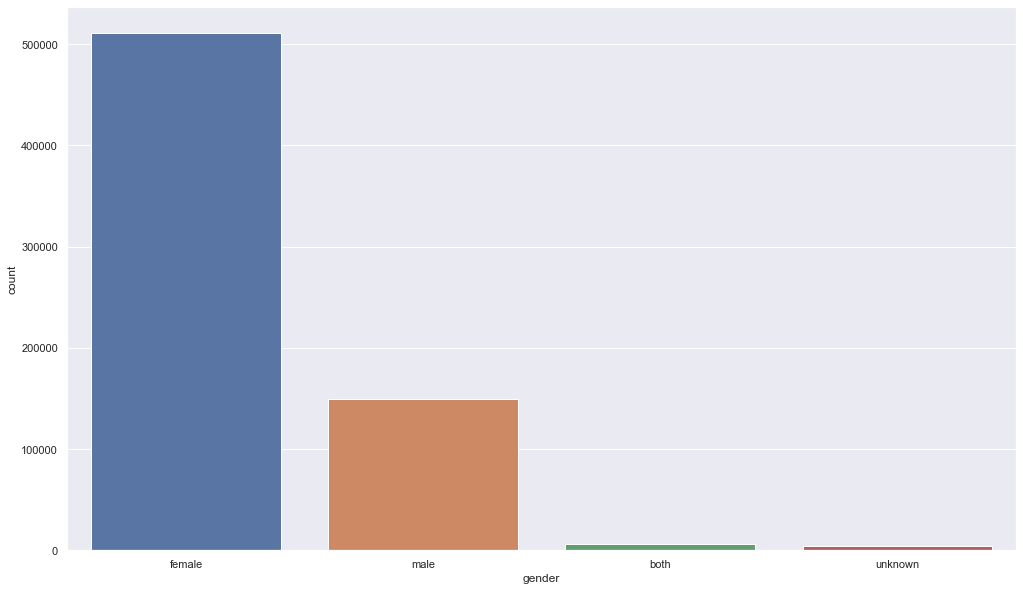

In [44]:
plt.figure(figsize=(17,10))
sns.countplot(x='gender', data=loans)

### Note:
As we can see Approximate. **65.1 % borrower** are **Female** and approximate. **23.6 % borrowers **are **Male**.

### Mean funded Amount by Gender

In [45]:
loans.borrower_genders = loans.gender.astype(str)
gender_data = pd.DataFrame(loans.gender.str.split(',').tolist())
loans['sex_borrowers'] = gender_data[0]
loans.loc[loans.sex_borrowers == 'nan', 'sex_borrowers'] = np.nan
sex_mean = pd.DataFrame(loans.groupby(['sex_borrowers'])['funded_amount'].mean().sort_values(ascending=False)).reset_index()
print(sex_mean)

  sex_borrowers  funded_amount
0       unknown     923.028903
1          both     888.893299
2          male     859.987266
3        female     762.012974


Text(0, 0.5, 'Average funded Amount(US)')

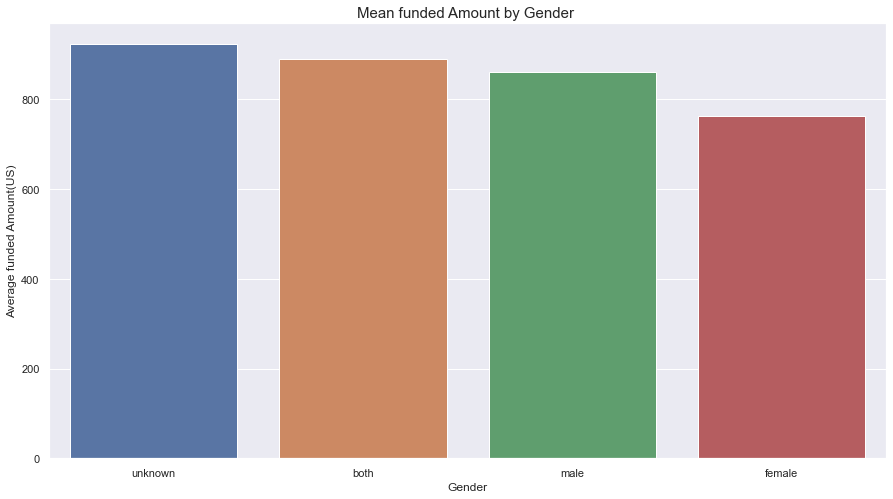

In [46]:
plt.figure(figsize=(15,8))
g1 = sns.barplot(x='sex_borrowers', y='funded_amount', data=sex_mean)
g1.set_title("Mean funded Amount by Gender ", fontsize=15)
g1.set_xlabel("Gender")
g1.set_ylabel("Average funded Amount(US)", fontsize=12)

### Note:
 The average amount is **funded** **more** by **Female** than Female.

### Sex_borrower V.S. Repayment_intervals

In [47]:
print("Genders count with repayment interval monthly\n",loans['sex_borrowers'][loans['repayment_interval'] == 'monthly'].value_counts())
print("Genders count with repayment interval weekly\n",loans['sex_borrowers'][loans['repayment_interval'] == 'weekly'].value_counts())
print("Genders count with repayment interval bullet\n",loans['sex_borrowers'][loans['repayment_interval'] == 'bullet'].value_counts())
print("Genders count with repayment interval irregular\n",loans['sex_borrowers'][loans['repayment_interval'] == 'irregular'].value_counts())

Genders count with repayment interval monthly
 female     242349
male        92895
both         4927
unknown      2546
Name: sex_borrowers, dtype: int64
Genders count with repayment interval weekly
 female    571
male       31
Name: sex_borrowers, dtype: int64
Genders count with repayment interval bullet
 male       35328
female     33914
unknown     1090
both         396
Name: sex_borrowers, dtype: int64
Genders count with repayment interval irregular
 female     234648
male        20950
both          975
unknown       585
Name: sex_borrowers, dtype: int64


Text(0.5, 1.0, 'sex borrowers with repayment_intervals')

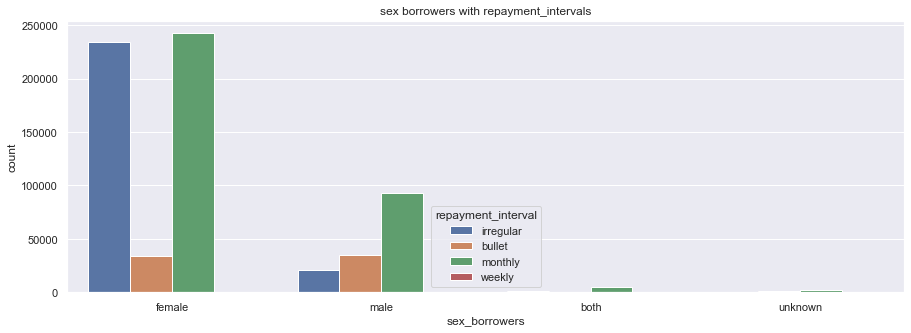

In [48]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="sex_borrowers", hue='repayment_interval', data=loans).set_title('sex borrowers with repayment_intervals')

### Note:
* There are **more Females** with **monthly** reapyment_interval than **Males**.
* There are **more Females** with **irregular** reapyment_interval than **Males**.

### Distribution of Kiva Field Partner Names with funding count

In [49]:
#Distribution of Kiva Field Partner Names with funding count
print("Top Kiva Field Partner Names with funding count : ",lenders["Field Partner Name"].nunique())
print(lenders["Field Partner Name"].value_counts().head(10))
lender = lenders['Field Partner Name'].value_counts().head(40)

Top Kiva Field Partner Names with funding count :  302
Alalay sa Kaunlaran (ASKI)                           1207
SEF International                                     992
Gata Daku Multi-purpose Cooperative (GDMPC)           952
Paglaum Multi-Purpose Cooperative (PMPC)              673
Interactuar                                           671
Thanh Hoa Microfinance Institution                    666
South Pacific Business Development (SPBD) - Samoa     398
Bai Tushum Bank                                       393
African Clean Energy (ACE)                            336
VisionFund Cambodia                                   324
Name: Field Partner Name, dtype: int64


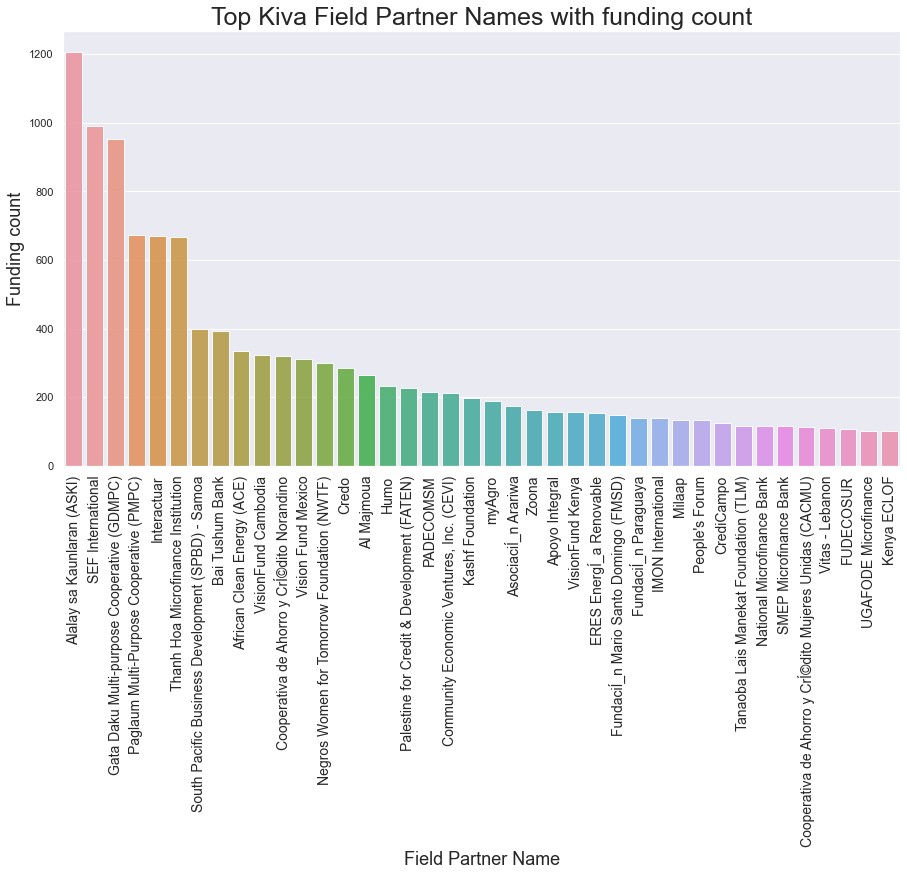

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(lender.index, lender.values, alpha=0.9)
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Field Partner Name', fontsize=18)
plt.ylabel('Funding count', fontsize=18)
plt.title("Top Kiva Field Partner Names with funding count", fontsize=25)
plt.show()

### Note:
* There are total **302 Kiva Field Partner.**
* Out of these, **Alalay sa Kaunlaran (ASKI)** did **higher** number of funding followed by **SEF International** and **Gata Daku Multi-purpose Cooperative (GDMPC)**.

### Top Countries with Funded_amount

Top Countries with funded_amount(sum values)
 AxesSubplot(0.125,0.125;0.775x0.755)


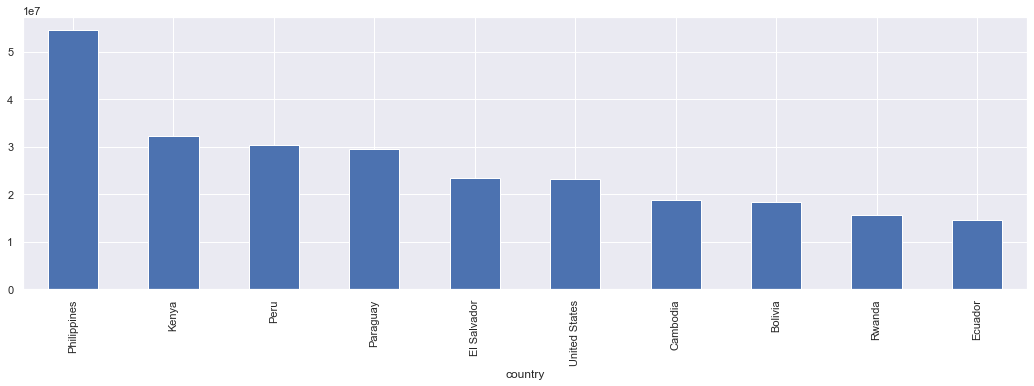

In [51]:
plt.figure(figsize=(18,5))
countries_funded_amount = loans.groupby('country').sum()['funded_amount'].sort_values(ascending = False).round(2)
print("Top Countries with funded_amount(sum values)\n",countries_funded_amount.nlargest(10).plot.bar())
plt.show()

### Top Countries with funded_amount(Dollar value of loan funded)(mean values)

In [52]:
countries_funded_amount = loans.groupby('country').mean()['funded_amount'].sort_values(ascending = False).round(2)
print("Top Countries with funded_amount(Dollar value of loan funded on Kiva.org)(Mean values)\n",countries_funded_amount.nlargest(10))

Top Countries with funded_amount(Dollar value of loan funded on Kiva.org)(Mean values)
 country
Cote D'Ivoire         50000.00
Mauritania            15000.00
Bhutan                 7812.50
Chile                  7625.00
Afghanistan            7000.00
Congo                  6142.58
Puerto Rico            4409.19
Dominican Republic     4200.60
Namibia                4046.88
United States          3800.84
Name: funded_amount, dtype: float64


<AxesSubplot:xlabel='country'>

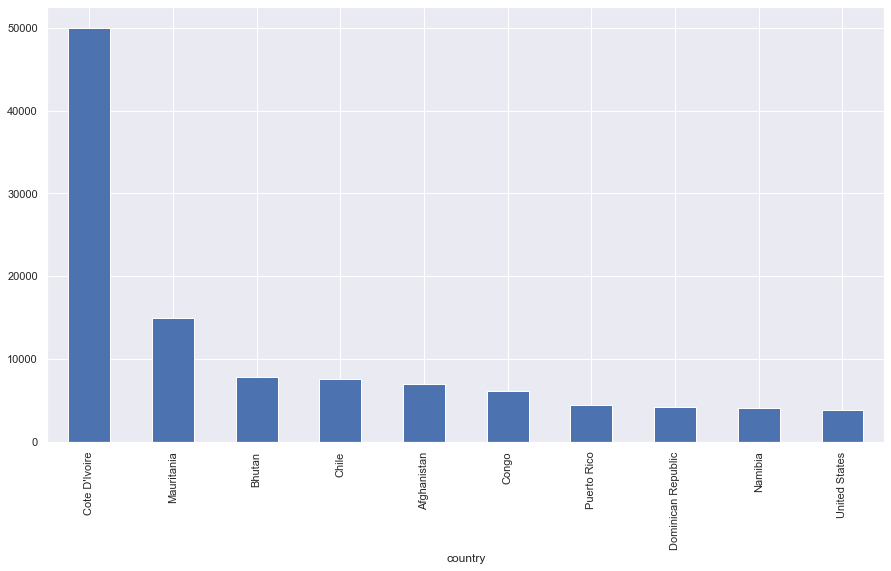

In [53]:
plt.figure(figsize=(15,8))
countries_funded_amount.nlargest(10).plot(kind='bar')

### Note:
   **Top** country **Cote D'Ivoire** which is **more loan** funded on Kiva.org follwed by **Mauritania**.

### Top mpi_regions with amount(Dollar value of loans funded in particular LocationName)¶

In [54]:
lenders.dropna(inplace=True)

In [55]:
mpi_region_amount = round(lenders.groupby('mpi_region').mean()['amount'].sort_values(ascending = False))
print("Top mpi_region with amount(Dollar value of loans funded in particular LocationName)(Mean values)\n",mpi_region_amount.nlargest(10))

Top mpi_region with amount(Dollar value of loans funded in particular LocationName)(Mean values)
 mpi_region
Cusco, Peru                                    1058733.0
Lima, Peru                                      286747.0
La Paz, Bolivia, Plurinational State of         255254.0
Zanzibar, Tanzania, United Republic of          249897.0
Santa Cruz, Bolivia, Plurinational State of     240492.0
Kigali City, Rwanda                             224055.0
Managua, Nicaragua                              219306.0
Masaya, Nicaragua                               208870.0
DKI Jakarta, Indonesia                          200462.0
Punjab, Pakistan                                164794.0
Name: amount, dtype: float64


<AxesSubplot:xlabel='mpi_region'>

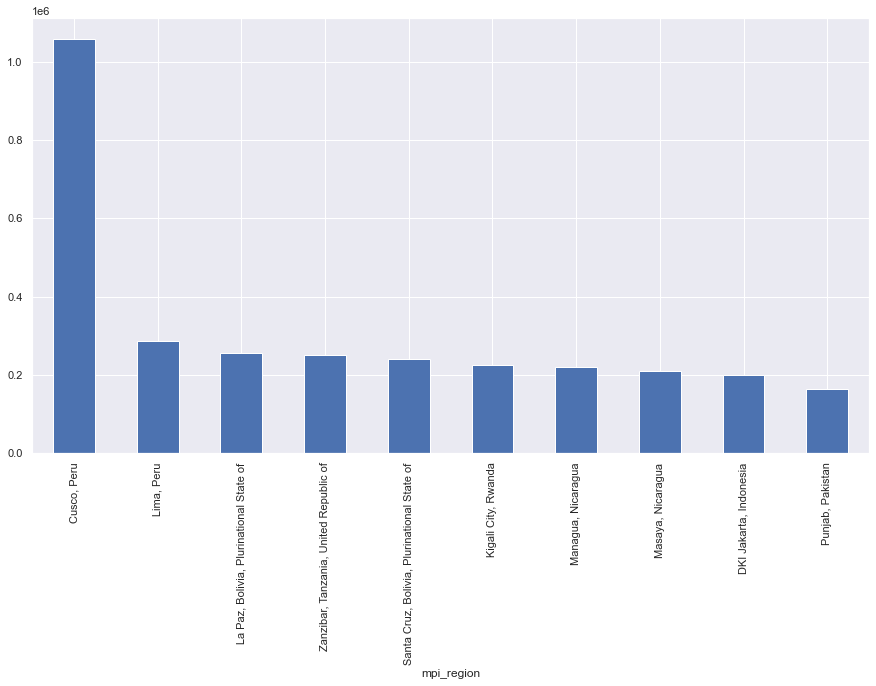

In [56]:
plt.figure(figsize=(15,8))
mpi_region_amount.nlargest(10).plot(kind='bar')

### Note:
* **Top mpi_regions** who got more funding is **Cusco, Peru** followed by **Lima, Peru**

##  Popular loan sector in terms of loan amount

Text(0.5, 1.0, 'Popular loan sector in terms of loan amount')

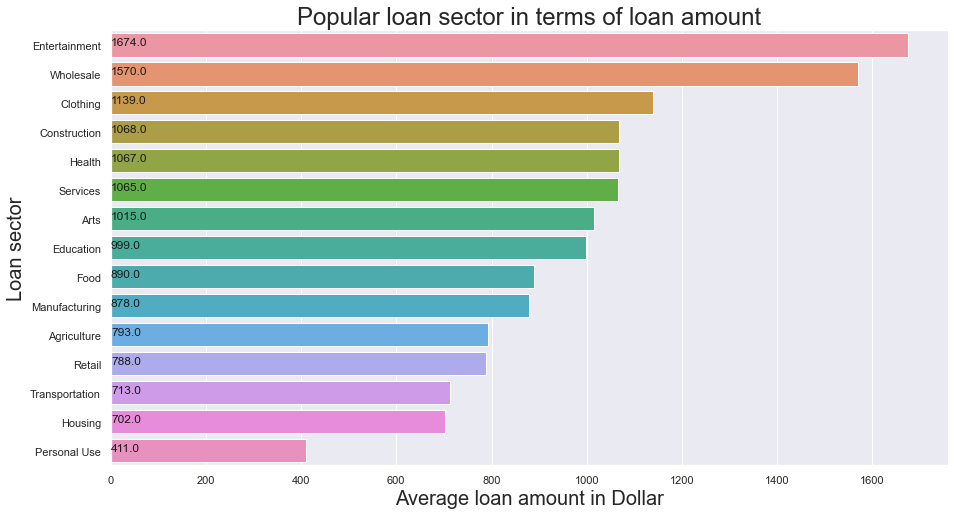

In [57]:
plt.figure(figsize=(15,8))
count = round(loans.groupby(['sector'])['loan_amount'].mean().sort_values(ascending=False))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('Loan sector', fontsize=20)
plt.title('Popular loan sector in terms of loan amount', fontsize=24)

### Note:
* **Entertainment** sector is taking more loan followed by **Wholesale**.

## Popular loan activity in terms of loan amount

Text(0.5, 1.0, 'Popular loan activity in terms of loan amount')

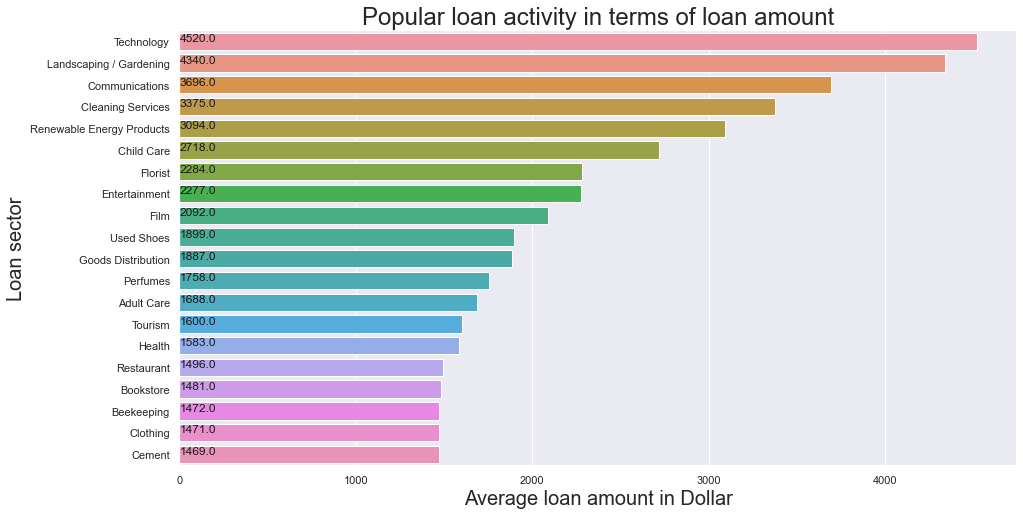

In [58]:
plt.figure(figsize=(15,8))
count = round(loans.groupby(['activity'])['loan_amount'].mean().sort_values(ascending=False).head(20))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('Loan sector', fontsize=20)
plt.title('Popular loan activity in terms of loan amount', fontsize=24)

### Note:
* The most popular activities are **Technology** and **Landscaping/Gardening** in terms of loans amount followed by **Communications**.

## Popular countries in terms of loan amount

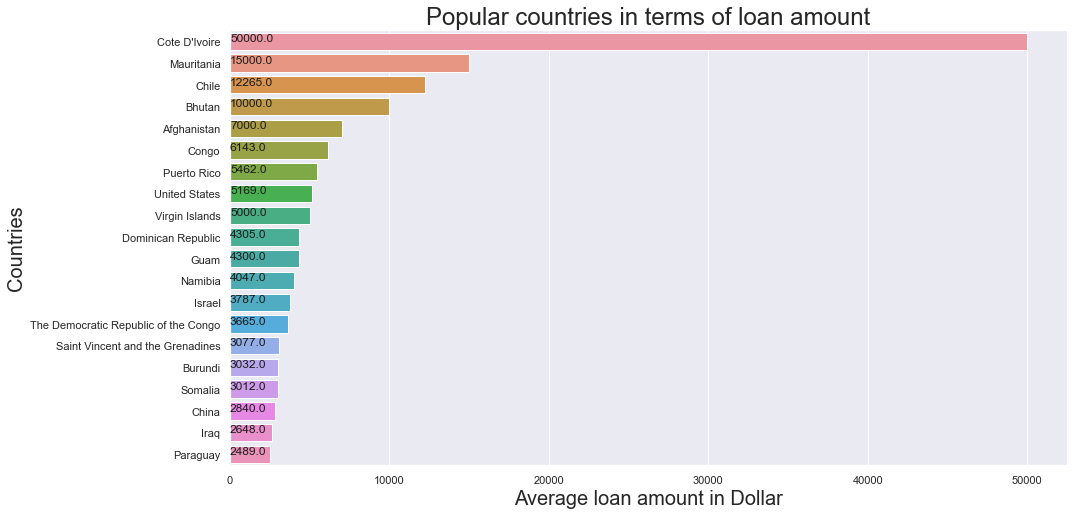

In [59]:
plt.figure(figsize=(15,8))
count = round(loans.groupby(['country'])['loan_amount'].mean().sort_values(ascending=False).nlargest(20))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('Countries', fontsize=20)
plt.title('Popular countries in terms of loan amount', fontsize=24)
plt.show()

### Note:
**Cote D'lvoire** is More popular country who is taking more amount of loans  followed by **Mauritania**.

## distribution of count of loan availed by each country

In [60]:
loans.head()

funded_amount  loan_amount             activity          sector   country  \
0          300.0        300.0  Fruits & Vegetables            Food  Pakistan   
1          575.0        575.0             Rickshaw  Transportation  Pakistan   
2          150.0        150.0       Transportation  Transportation     India   
3          200.0        200.0           Embroidery            Arts  Pakistan   
4          400.0        400.0           Milk Sales            Food  Pakistan   

  currency               posted_time            disbursed_time  \
0      PKR 2014-01-01 06:12:39+00:00 2013-12-17 08:00:00+00:00   
1      PKR 2014-01-01 06:51:08+00:00 2013-12-17 08:00:00+00:00   
2      INR 2014-01-01 09:58:07+00:00 2013-12-17 08:00:00+00:00   
3      PKR 2014-01-01 08:03:11+00:00 2013-12-24 08:00:00+00:00   
4      PKR 2014-01-01 11:53:19+00:00 2013-12-17 08:00:00+00:00   

                funded_time  term_in_months  lender_count borrower_genders  \
0 2014-01-02 10:06:32+00:00            12.0            12           female   
1 2014-01-02 09:17:23+00:00            11.0            14           female   
2 2014-01-01 16:01:36+00:00            43.0             6           female   
3 2014-01-01 13:00:00+00:00            11.0             8           female   
4 2014-01-01 19:18:51+00:00            14.0            16           female   

  repayment_interval  gender sex_borrowers  
0          irregular  female        female  
1          irregular  female        female  
2             bullet  female        female  
3          irregular  female        female  
4            monthly  female        female

In [61]:
loan = loans.groupby('country')['loan_amount'].mean()
loan

country
Afghanistan                              7000.000000
Albania                                  1378.748707
Armenia                                  1496.396710
Azerbaijan                               1485.192802
Belize                                    912.200000
Benin                                    1044.164990
Bhutan                                  10000.000000
Bolivia                                  2253.378378
Brazil                                   2331.690141
Burkina Faso                             1208.414634
Burundi                                  3031.647727
Cambodia                                  570.464462
Cameroon                                  419.887892
Chile                                   12265.000000
China                                    2839.738806
Colombia                                  655.403501
Congo                                    6142.578125
Costa Rica                               1380.989750
Cote D'Ivoire                         

### Note:
In **2017,** **Cote D'lvoire** and **Benin** had taken more amount of loan and in **2016**, **South sudan** had taken.

# Correlation and Heatmap:

### Sectors and Repayment Intervals correlation

In [62]:
sector_repayment = ['sector', 'repayment_interval']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(loans[sector_repayment[0]], loans[sector_repayment[1]]).style.background_gradient(cmap = cm)

### Note:
* **Agriculture Sector** had **higher** number of **monthly** repayment interval followed by **food sector** had **higher** **irregilar** repayment interval.

## country and Repayment Intervals correlation

In [63]:
sector_repayment = ['country', 'repayment_interval']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(loans[sector_repayment[0]], loans[sector_repayment[1]]).style.background_gradient(cmap = cm)

### Note:
* Weekly repayment interval loan had taken by only Kenya country.
* **Phillippines** had higher number of **irregular repayment interval** than others.

## Correlation and Heatmap of kiva_loans_data

funded_amount  loan_amount  term_in_months  lender_count
funded_amount        1.000000     0.945044        0.149310      0.849168
loan_amount          0.945044     1.000000        0.184795      0.798697
term_in_months       0.149310     0.184795        1.000000      0.227283
lender_count         0.849168     0.798697        0.227283      1.000000

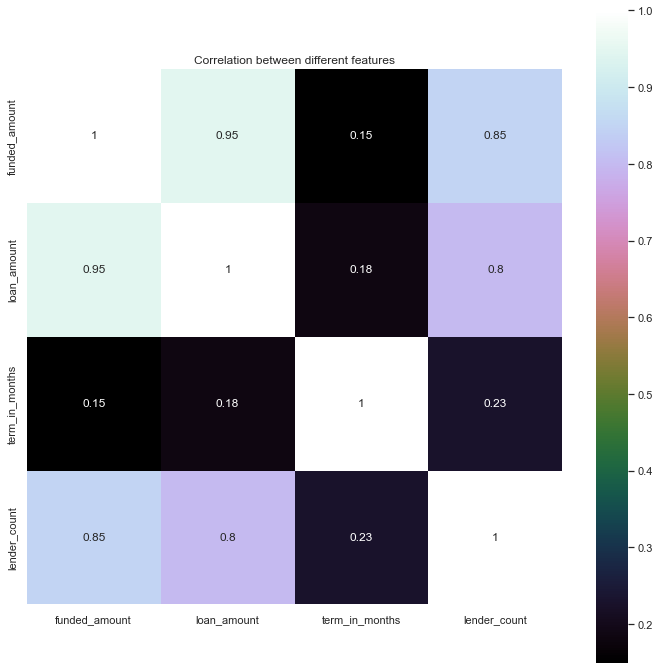

In [64]:
#Correlation Matrix
corr = loans.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation between different features')
corr

### Note:
* As we can see **loan_amount** and **funded_amount** are highly correlated.

## The relation between Term_In_Months & Repayment_Interval 

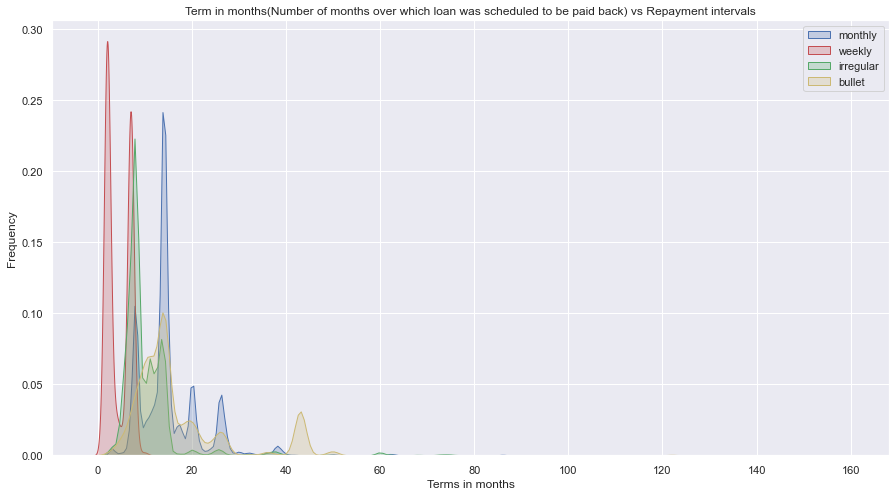

In [65]:
fig = plt.figure(figsize=(15,8))
ax=sns.kdeplot(loans['term_in_months'][loans['repayment_interval'] == 'monthly'] , color='b',shade=True, label='monthly')
ax=sns.kdeplot(loans['term_in_months'][loans['repayment_interval'] == 'weekly'] , color='r',shade=True, label='weekly')
ax=sns.kdeplot(loans['term_in_months'][loans['repayment_interval'] == 'irregular'] , color='g',shade=True, label='irregular')
ax=sns.kdeplot(loans['term_in_months'][loans['repayment_interval'] == 'bullet'] , color='y',shade=True, label='bullet')
plt.title('Term in months(Number of months over which loan was scheduled to be paid back) vs Repayment intervals')
plt.legend()
ax.set(xlabel='Terms in months', ylabel='Frequency')
plt.show()

### Note:
Repayment Interval **weekly** having **higher frequency** than others repayment intervals

##  Loan theme created specifically for Kiva or not ?

In [66]:
temp = lenders['forkiva'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Loan specifically for Kiva V.S. Loan not specifically for Kiva')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Note:
* In only **16 % loans**, loan was **specifically created for Kiva**.

# Time Series Analysis:

## loan amount V.S. funded amount

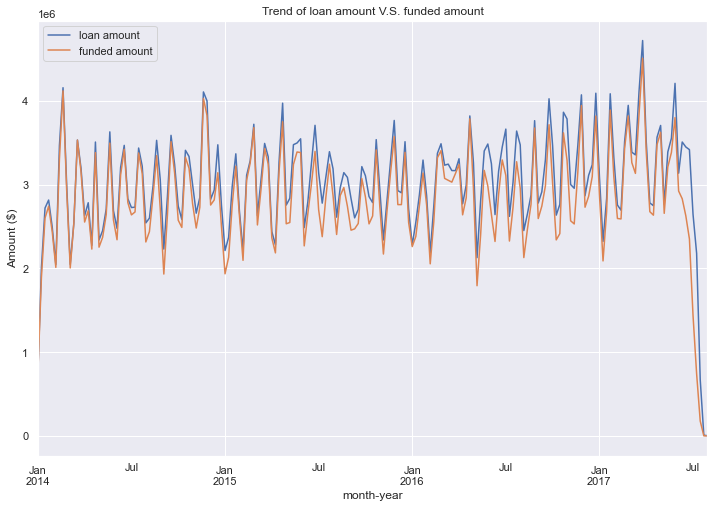

In [67]:
loans.index = pd.to_datetime(loans['posted_time'])
plt.figure(figsize = (12, 8))
ax = loans['loan_amount'].resample('w').sum().plot()
ax = loans['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Amount ($)')
ax.set_xlabel('month-year')
ax.set_xlim((pd.to_datetime(loans['posted_time'].min()), 
             pd.to_datetime(loans['posted_time'].max())))
ax.legend(["loan amount", "funded amount"])
plt.title('Trend of loan amount V.S. funded amount')

plt.show()

## unfunded amount V.S. funded amount:

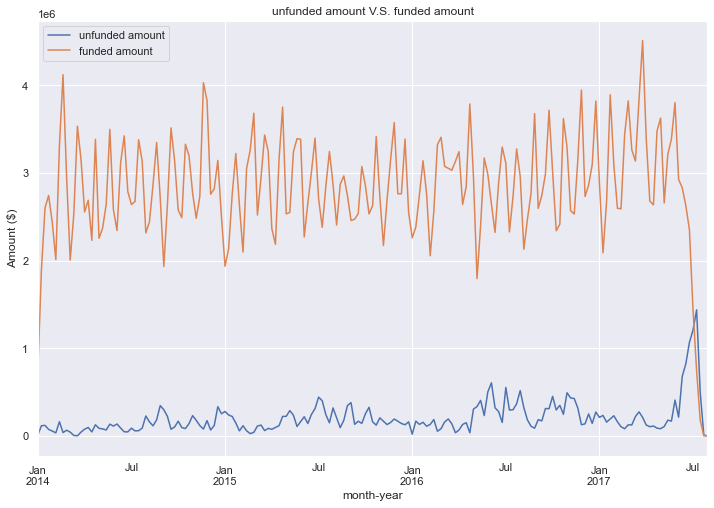

In [68]:
loans.index = pd.to_datetime(loans['posted_time'])

loans['unfunded_amount'] = loans['loan_amount'] - loans['funded_amount']
plt.figure(figsize = (12, 8))
ax = loans['unfunded_amount'].resample('w').sum().plot()
ax = loans['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Amount ($)')
ax.set_xlabel('month-year')
ax.set_xlim((pd.to_datetime(loans['posted_time'].min()), 
             pd.to_datetime(loans['posted_time'].max())))
ax.legend(["unfunded amount", "funded amount"])
plt.title('unfunded amount V.S. funded amount')
plt.show()

### to find the most popular sector (loan_amount) in each year

In [69]:
loans['year'] = pd.DatetimeIndex(loans['funded_time']).year

<AxesSubplot:xlabel='sector'>

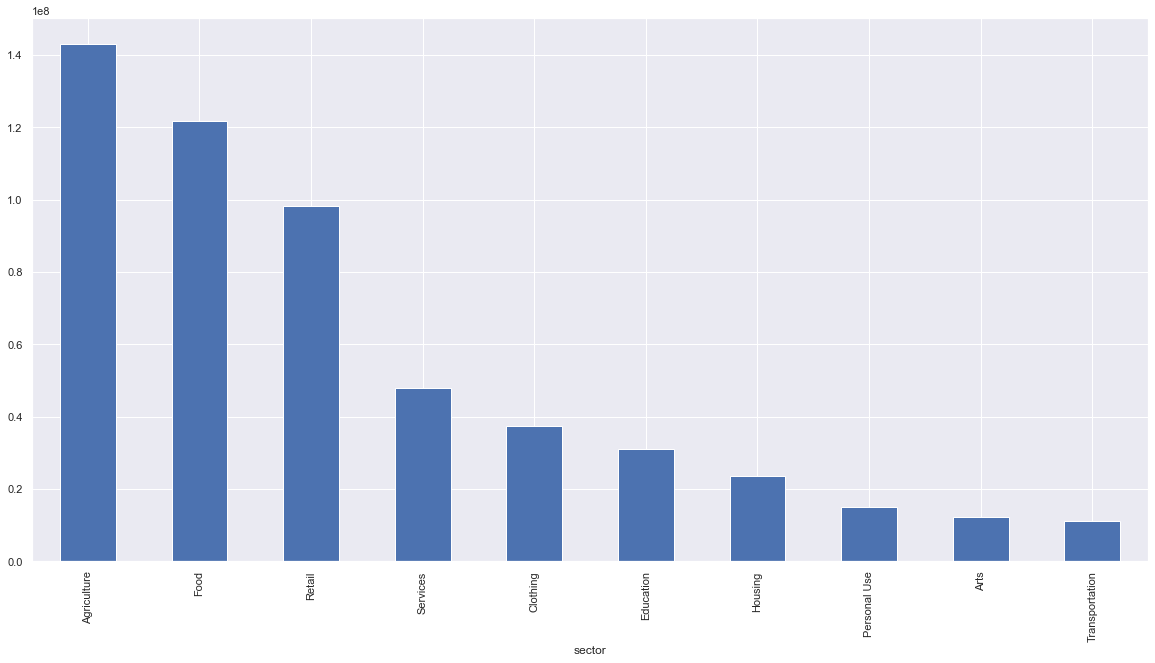

In [70]:
plt.figure(figsize=(20,10))
loans.groupby(['sector'])['loan_amount'].sum().nlargest(10).plot.bar()

## Disbursed to borrower V.S. Posted on kiva.org V.S. Funded on kiva

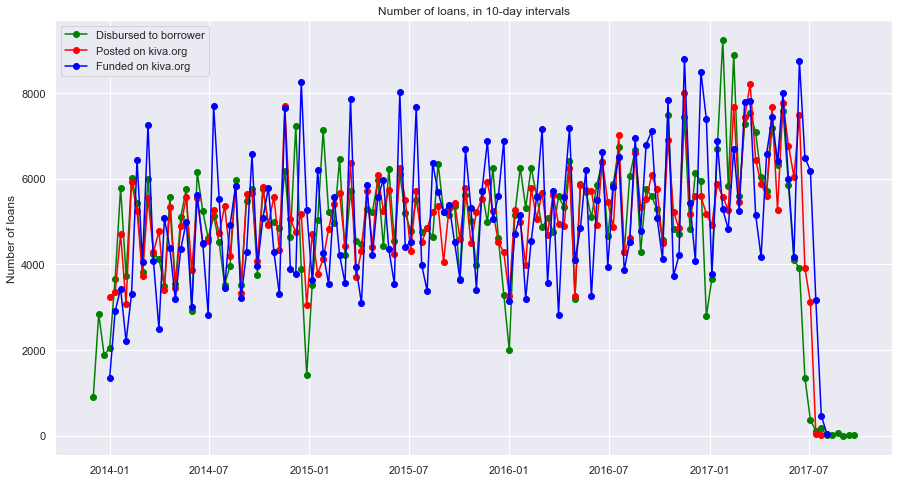

In [71]:
temp_data = loans.copy()
temp_data['count']= 1  #add 1 to each row so we can count number of loans 
disbursed = temp_data.set_index(temp_data['disbursed_time'])
#disbursed.head()
disbursed = disbursed.resample('10D').sum()

posted = temp_data.set_index(temp_data['posted_time'])
posted = posted.resample('10D').sum()

funded = temp_data.set_index(temp_data['funded_time'])
funded = funded.resample('10D').sum()

plt.figure(figsize=(15,8))
plt.plot(disbursed['count'], color='green', label='Disbursed to borrower', marker='o')
plt.plot(posted['count'], color='red', label='Posted on kiva.org', marker='o')
plt.plot(funded['count'], color='blue', label='Funded on kiva.org', marker='o')
plt.legend()
plt.title("Number of loans, in 10-day intervals")
plt.ylabel("Number of loans")
plt.show()

### Note:
* Most of the loan amount were Disbursed to borrower at 2nd month of year ie. 2nd month of 2014, 2015, 2016 and 2017 despite not being fully funded yet

In [72]:
loans.drop(columns=['sex_borrowers','unfunded_amount','borrower_genders'],inplace=True)

In [73]:
loans.reset_index(drop=True,inplace=True)

In [74]:
loans.head()

funded_amount  loan_amount             activity          sector   country  \
0          300.0        300.0  Fruits & Vegetables            Food  Pakistan   
1          575.0        575.0             Rickshaw  Transportation  Pakistan   
2          150.0        150.0       Transportation  Transportation     India   
3          200.0        200.0           Embroidery            Arts  Pakistan   
4          400.0        400.0           Milk Sales            Food  Pakistan   

  currency               posted_time            disbursed_time  \
0      PKR 2014-01-01 06:12:39+00:00 2013-12-17 08:00:00+00:00   
1      PKR 2014-01-01 06:51:08+00:00 2013-12-17 08:00:00+00:00   
2      INR 2014-01-01 09:58:07+00:00 2013-12-17 08:00:00+00:00   
3      PKR 2014-01-01 08:03:11+00:00 2013-12-24 08:00:00+00:00   
4      PKR 2014-01-01 11:53:19+00:00 2013-12-17 08:00:00+00:00   

                funded_time  term_in_months  lender_count repayment_interval  \
0 2014-01-02 10:06:32+00:00            12.0            12          irregular   
1 2014-01-02 09:17:23+00:00            11.0            14          irregular   
2 2014-01-01 16:01:36+00:00            43.0             6             bullet   
3 2014-01-01 13:00:00+00:00            11.0             8          irregular   
4 2014-01-01 19:18:51+00:00            14.0            16            monthly   

   gender  year  
0  female  2014  
1  female  2014  
2  female  2014  
3  female  2014  
4  female  2014

###  Top funded sectors in Egypt

<AxesSubplot:xlabel='sector'>

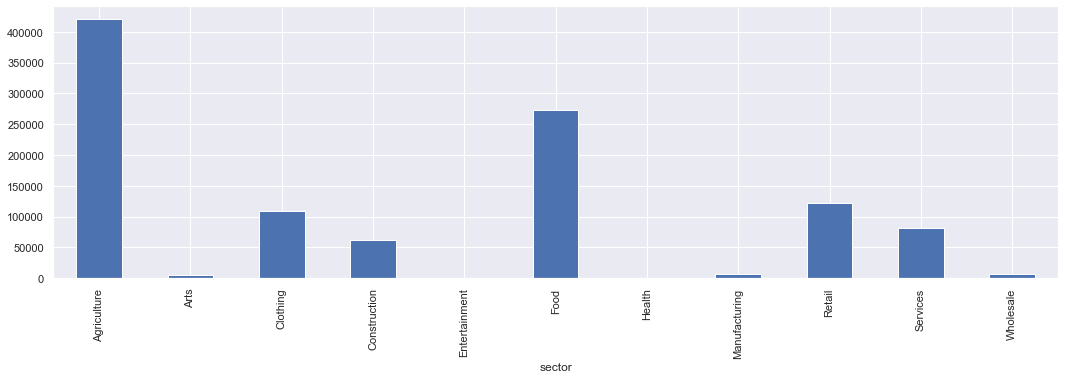

In [75]:
plt.figure(figsize=(18,5))
egypt = loans['sector'][loans['country'] == 'Egypt']
loans.groupby(egypt)['funded_amount'].sum().plot.bar()

### Note:
**Agriculture is the highest sector (funded_amount) whose followed by food in EGYPT**

### Top loaned sectors in Egypt

<AxesSubplot:xlabel='sector'>

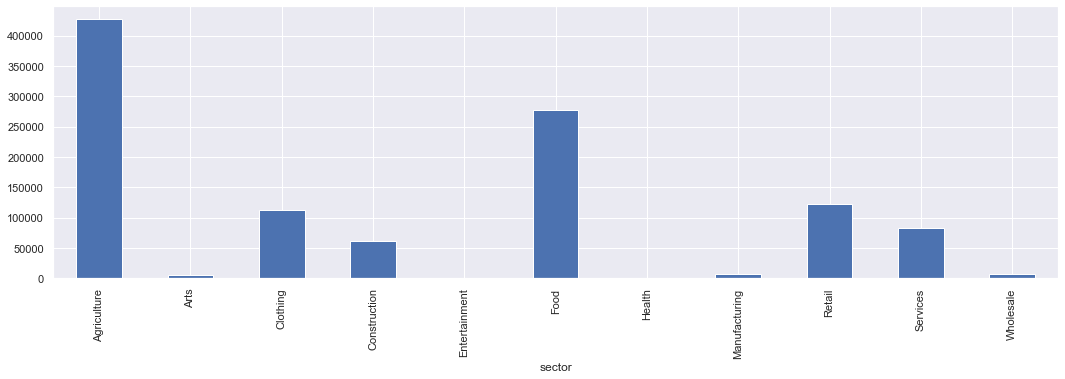

In [76]:
plt.figure(figsize=(18,5))
egypt = loans['sector'][loans['country'] == 'Egypt']
loans.groupby(egypt)['loan_amount'].sum().plot.bar()

### Note:
**Agriculture is the highest sector (loaned_amount) whose followed by food in EGYPT**

### Top lender_count in EGYPT

<AxesSubplot:xlabel='lender_count'>

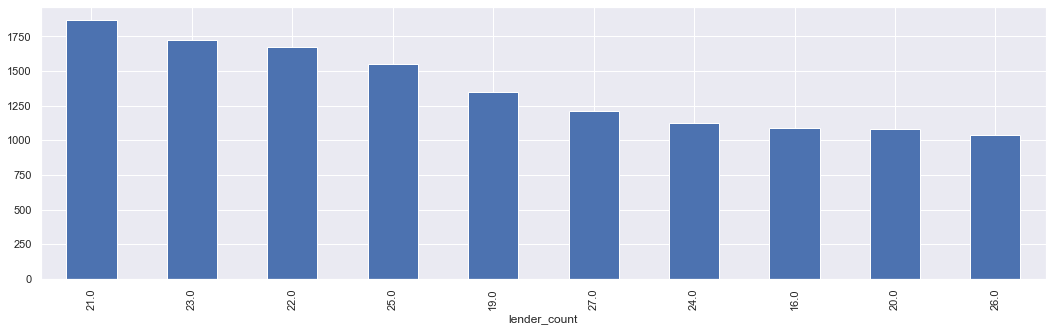

In [77]:
plt.figure(figsize=(18,5))
egypt = loans['lender_count'][loans['country'] == 'Egypt']
loans.groupby(egypt)['lender_count'].sum().nlargest(10).plot.bar()

In [78]:
loans.to_csv('loans_final.csv')

## THANKS